The goal of this project was to create an image classifier that will accurately predict what style of architecture a building is influenced by. This would be very useful to any professionals in the real estate market who are looking to either label or search for property programmatically.

A really great dataset was compiled by the Sydney Insitute of Technology of 5000 photos across 25 architecture style categories



In [4]:
import os
import shutil
src_folders = os.listdir(src)
print(src_folders)

['.DS_Store', 'Achaemenid architecture', 'American craftsman style', 'American Foursquare architecture', 'Ancient Egyptian architecture', 'arcNames25.txt', 'arcRelationship25.txt', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'ReadMe', 'ReadMe~', 'relationship.txt', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [5]:
import matplotlib.pyplot as pyplot

In [ ]:
import os
folders_needed = ['training', 'validation', 'testing']
for folder in folders_needed:
    if not os.path.exists(folder):
            os.mkdir(folder)
    else:
        pass

In [7]:
folder_list = []

for item in os.listdir(src):
    if (os.path.isdir(os.path.join(src,item))):
        #print(len(os.listdir(os.path.join(src,item))))
        folder_list.append(item)

folder_list

['Achaemenid architecture',
 'American craftsman style',
 'American Foursquare architecture',
 'Ancient Egyptian architecture',
 'Art Deco architecture',
 'Art Nouveau architecture',
 'Baroque architecture',
 'Bauhaus architecture',
 'Beaux-Arts architecture',
 'Byzantine architecture',
 'Chicago school architecture',
 'Colonial architecture',
 'Deconstructivism',
 'Edwardian architecture',
 'Georgian architecture',
 'Gothic architecture',
 'Greek Revival architecture',
 'International style',
 'Novelty architecture',
 'Palladian architecture',
 'Postmodern architecture',
 'Queen Anne architecture',
 'Romanesque architecture',
 'Russian Revival architecture',
 'Tudor Revival architecture']

In [9]:
def copy_files(name_of_dest_dir, files):
    destination = os.path.join(name_of_dest_dir,folder)
    print(destination)
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    else:
        pass
    for file in files:
        full_file_name = os.path.join(src,folder,file)

        if (os.path.isfile(full_file_name)):
            shutil.copy(full_file_name, destination)
        
import math

for folder in folder_list:
    src_files = os.listdir(os.path.join(src,folder))
    number_of_files_in_folder = math.floor((len(os.listdir(os.path.join(src,folder)))))
    training_files = src_files[0:math.floor(number_of_files_in_folder*.5)]
    valid_files = src_files[math.floor(number_of_files_in_folder*.5):math.floor(number_of_files_in_folder*.75)]
    test_files = src_files[math.floor(number_of_files_in_folder*.75):]
    
    copy_files('training', training_files)
    copy_files('validation', valid_files)
    copy_files('testing', test_files)
       

training/Achaemenid architecture
validation/Achaemenid architecture
testing/Achaemenid architecture
training/American craftsman style
validation/American craftsman style
testing/American craftsman style
training/American Foursquare architecture
validation/American Foursquare architecture
testing/American Foursquare architecture
training/Ancient Egyptian architecture
validation/Ancient Egyptian architecture
testing/Ancient Egyptian architecture
training/Art Deco architecture
validation/Art Deco architecture
testing/Art Deco architecture
training/Art Nouveau architecture
validation/Art Nouveau architecture
testing/Art Nouveau architecture
training/Baroque architecture
validation/Baroque architecture
testing/Baroque architecture
training/Bauhaus architecture
validation/Bauhaus architecture
testing/Bauhaus architecture
training/Beaux-Arts architecture
validation/Beaux-Arts architecture
testing/Beaux-Arts architecture
training/Byzantine architecture
validation/Byzantine architecture
testing

In [354]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


train_dir = 'training'
validation_dir ='validation'
test_dir = 'testing'


In [416]:

import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks

DEV = False
argvs = sys.argv
argc = len(argvs)

if argc > 1 and (argvs[1] == "--development" or argvs[1] == "-d"):
  DEV = True

if DEV:
  epochs = 2
else:
  epochs = 30

train_data_path = 'training'
validation_data_path = 'validation'

"""
Parameters
"""
img_width, img_height = 150, 150
batch_size = 32
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 25
lr = 0.0004

model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


/home/charlie/.conda/envs/dataweekends-rl/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., padding="same")`
/home/charlie/.conda/envs/dataweekends-rl/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
/home/charlie/.conda/envs/dataweekends-rl/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`


Found 2392 images belonging to 25 classes.
Found 1409 images belonging to 25 classes.


In [417]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
activation_37 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_38 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 37, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 88800)             0         
__________

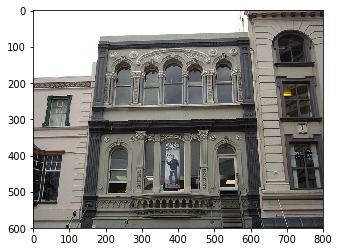

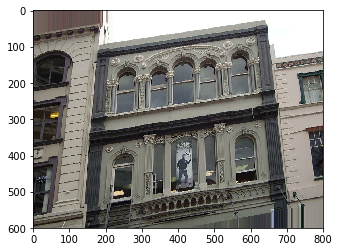

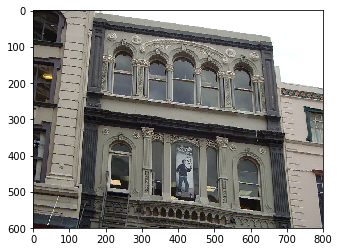

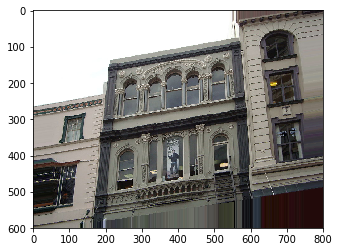

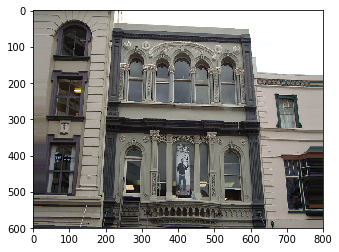

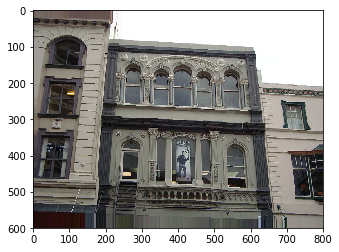

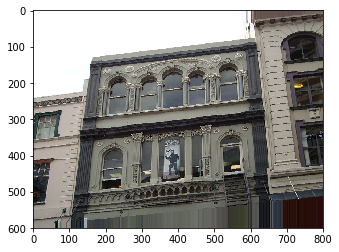

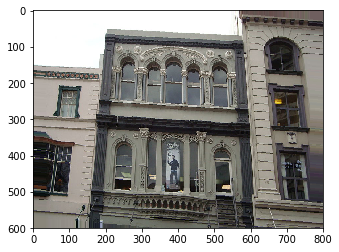

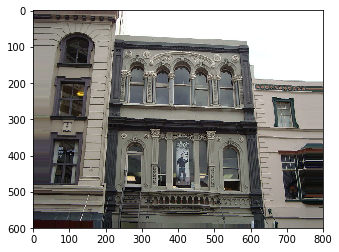

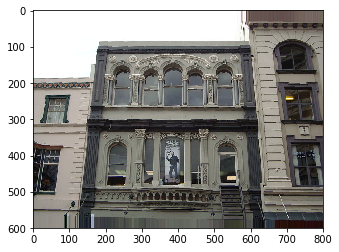

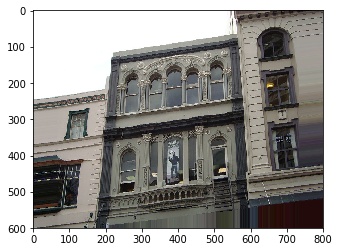

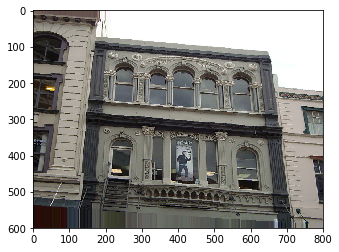

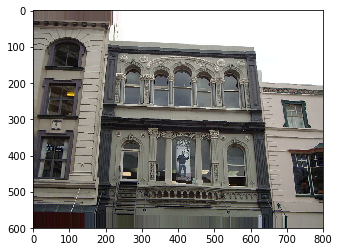

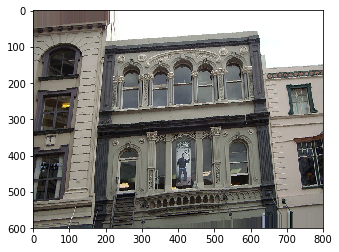

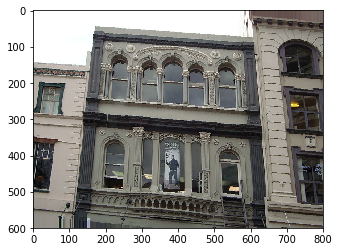

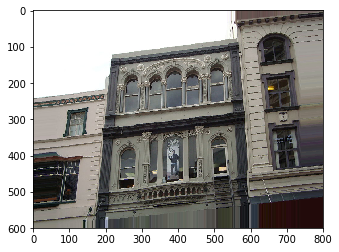

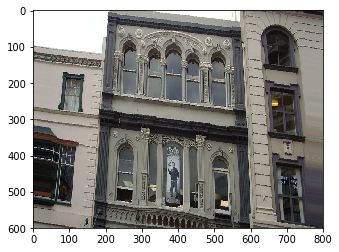

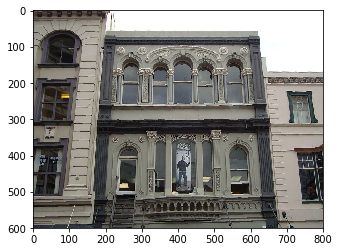

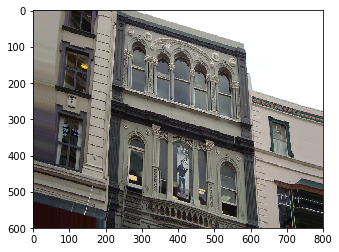

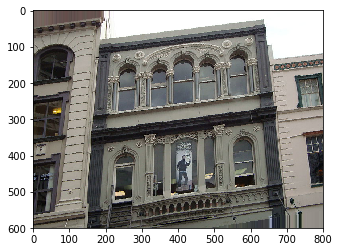

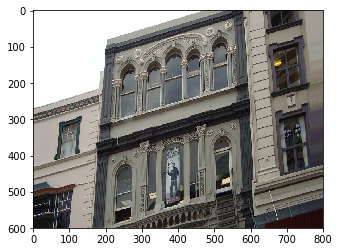

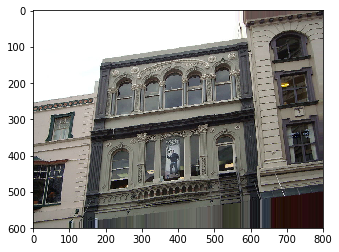

In [423]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

img = load_img('training/Edwardian architecture/37_800px-Flickr_-_jabbapablo_-_Spruced_Up_Edwardian_Facade.jpg')  
pyplot.imshow(img)
pyplot.show()
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='./', save_prefix='test_image', save_format='jpeg'):
    pyplot.imshow(batch[0])
    pyplot.show()

    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [418]:

"""
Tensorboard log
"""
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir)
cbks = [tb_cb]

history = model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model_lowerlr.h5')
model.save_weights('./models/weights_lowerlr.h5')

/home/charlie/.conda/envs/dataweekends-rl/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=30, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=300, steps_per_epoch=31)`
  from ipykernel import kernelapp as app


Epoch 1/30
31/31 [==============================] - 117s 4s/step - loss: 5.3979 - acc: 0.0736 - val_loss: 3.0881 - val_acc: 0.1594
Epoch 2/30
31/31 [==============================] - 112s 4s/step - loss: 3.0726 - acc: 0.1286 - val_loss: 2.9984 - val_acc: 0.1468
Epoch 3/30
31/31 [==============================] - 111s 4s/step - loss: 3.0260 - acc: 0.1411 - val_loss: 2.9265 - val_acc: 0.1993
Epoch 4/30
31/31 [==============================] - 111s 4s/step - loss: 2.9522 - acc: 0.1603 - val_loss: 2.8354 - val_acc: 0.2031
Epoch 5/30
31/31 [==============================] - 116s 4s/step - loss: 2.8596 - acc: 0.1851 - val_loss: 2.8006 - val_acc: 0.1945
Epoch 6/30
31/31 [==============================] - 111s 4s/step - loss: 2.7800 - acc: 0.1925 - val_loss: 2.7196 - val_acc: 0.2034
Epoch 7/30
31/31 [==============================] - 112s 4s/step - loss: 2.8222 - acc: 0.1835 - val_loss: 2.6459 - val_acc: 0.2494
Epoch 8/30
31/31 [==============================] - 114s 4s/step - loss: 2.7315 - a

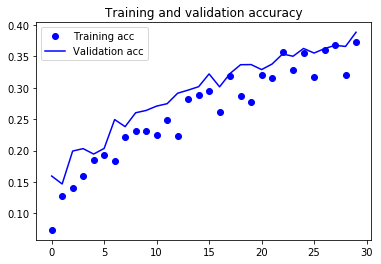

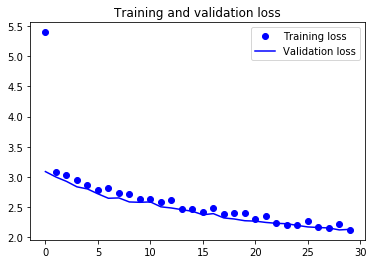

In [421]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

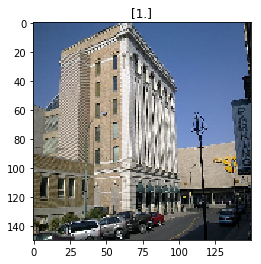

Predict:  American craftsman style
Actual:  Chicago school architecture


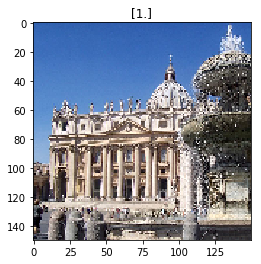

Predict:  Palladian architecture
Actual:  Baroque architecture


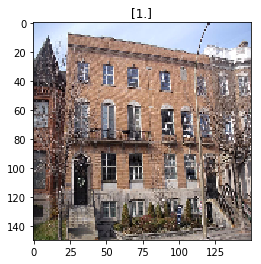

Predict:  American craftsman style
Actual:  Georgian architecture


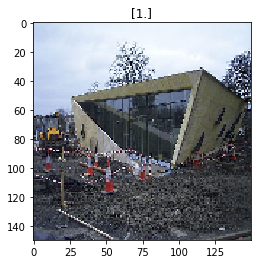

Predict:  Palladian architecture
Actual:  Deconstructivism


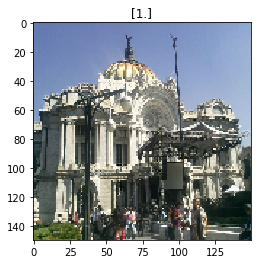

Predict:  American craftsman style
Actual:  Art Deco architecture


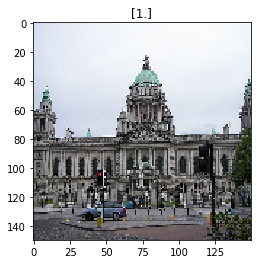

Predict:  American craftsman style
Actual:  Edwardian architecture


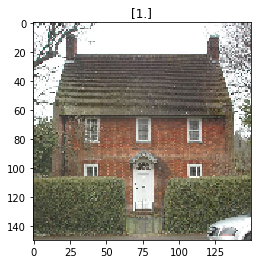

Predict:  Georgian architecture
Actual:  Georgian architecture


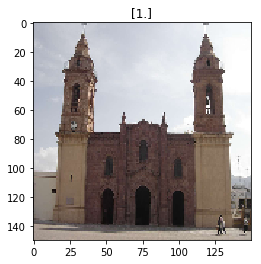

Predict:  Novelty architecture
Actual:  Colonial architecture


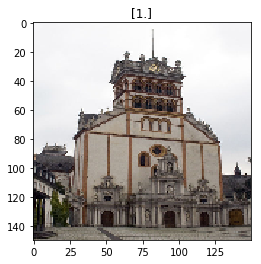

Predict:  Art Deco architecture
Actual:  Romanesque architecture


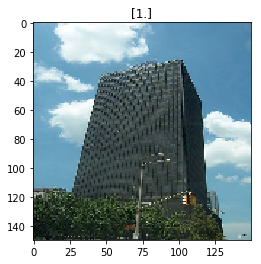

Predict:  Romanesque architecture
Actual:  International style


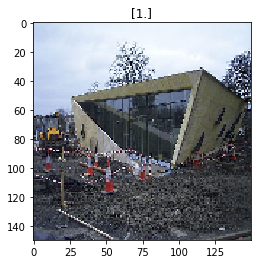

Predict:  Palladian architecture
Actual:  Deconstructivism


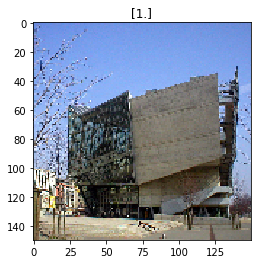

Predict:  Palladian architecture
Actual:  Deconstructivism


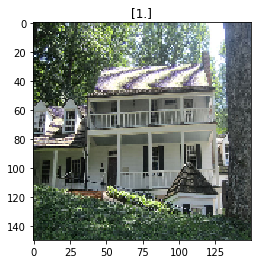

Predict:  Palladian architecture
Actual:  Palladian architecture


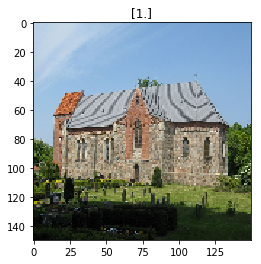

Predict:  Ancient Egyptian architecture
Actual:  Tudor Revival architecture


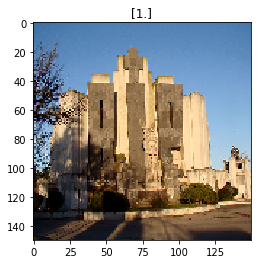

Predict:  American craftsman style
Actual:  Art Deco architecture


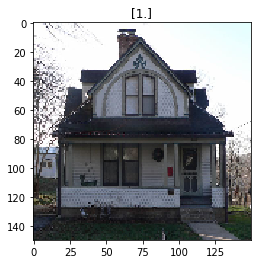

Predict:  Palladian architecture
Actual:  Queen Anne architecture


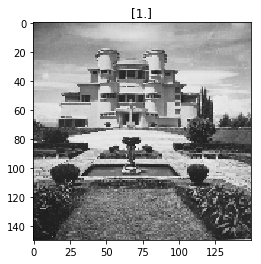

Predict:  Palladian architecture
Actual:  Colonial architecture


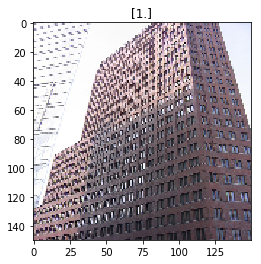

Predict:  Deconstructivism
Actual:  Postmodern architecture


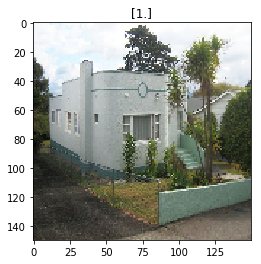

Predict:  Russian Revival architecture
Actual:  Art Deco architecture


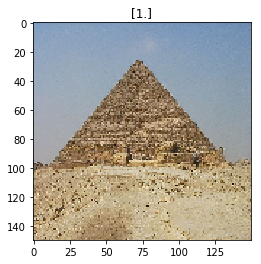

Predict:  Bauhaus architecture
Actual:  Ancient Egyptian architecture


In [536]:
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import random 
from keras.models import load_model

i = 0

def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))

    img = image.img_to_array(img)
    x = np.true_divide(img, 255)
    x = np.expand_dims(img, axis=0)

    preds = model.predict(x)
    return preds

labels= ['Edwardian architecture',
         'American Foursquare architecture',
         'Baroque architecture',
         'Bauhaus architecture',
         'American craftsman style',
         'Ancient Egyptian architecture',
         'Art Deco architecture',
         'Art Nouveau architecture',
         'Chicago school architecture',
         'Greek Revival architecture',
         'Deconstructivism',
         'Novelty architecture',
         'Byzantine architecture',
         'Tudor Revival architecture',
         'Postmodern architecture',
         'Achaemenid architecture',
         'Georgian architecture',
         'International style',
         'Russian Revival architecture',
         'Colonial architecture',
         'Romanesque architecture',
         'Palladian architecture',
         'Gothic architecture',
         'Queen Anne architecture',
         'Beaux-Arts architecture']

MODEL_PATH = 'model.h5'

# Load your trained model
model = load_model(MODEL_PATH)
model._make_predict_function()          # Necessary


while i<20:
    folder = os.listdir('testing')[random.randint(0,24)]
    folder_path = os.path.join('testing',folder)
    image_path = os.path.join('testing',folder, os.listdir(folder_path)[random.randint(0,10)])

    img = image.load_img(path=image_path,target_size=(150,150))
    
    plt.imshow(img)
    plt.title(classname)
    plt.show()
    
    preds = model_predict(image_path, model)
    pred_class = preds.argmax(-1) 
    result = str(labels[pred_class[0]]) 
    
    print("Predict: ",result)#os.listdir('training')[classname[0]])
    print("Actual: ", folder)
          
    i+=1